In this notebook, we create folders with image data for each type of odd galaxy and we also create their labels. This notebook essentially prepares the data for the odd classifier to train on.

In [ ]:
import os
path = '/content/drive/Shared drives/DLP Project/Backup Project/Models/Odd Classifier'
os.chdir(path)

In [ ]:
# Installing dependencies not pre-installed on Colab
# !pip install tensorflow -q
# !pip install opencv-python -q

In [ ]:
# Importing dependencies
%run ../imports.py
%matplotlib inline

Two debiased Galaxy Zoo tables are provided on the Galaxy Zoo website. The website strongly advises the use of the Hart et al. (2016) table, as this debiases the GZ2 question tree most consistently. In this notebook, we will work with this table.

In [ ]:
df = pd.read_csv('gz2_hart16.csv')

In [ ]:
# Dropping objects that are either stars or artifacts
df = df.drop(labels=np.where(df['gz2_class'] == 'A')[0], axis=0)

# Choosing objects that over 80% of volunteers said were odd
df = df[df['t06_odd_a14_yes_fraction'] > 0.80]

# Resetting inices to avoid confusion
df = df.reset_index(drop=True)

Any feature in the galaxy users identified as “odd” appears at the end of the string in parentheses: '(r)'=ring, '(l)'=lens/arc, '(d)'=disturbed, '(i)'=irregular, '(o)'=other, '(m)'=merger, '(u)'=dust lane. We keep only these classes.

In [ ]:
classes_to_keep = [i for i in df['gz2_class'].unique() if any(j in i for j in ['(', ')'])]

In [ ]:
classes_to_drop = [i for i in df['gz2_class'].unique() if i not in classes_to_keep]

In [ ]:
mask = df['gz2_class'].isin(classes_to_drop)
indices_to_drop = np.where(mask)[0]

In [ ]:
df = df.drop(labels=indices_to_drop, axis=0)

In [ ]:
odd_df = df.reset_index(drop=True)

In [ ]:
odd_df.head(5)

,dr7objid,ra,dec,rastring,decstring,sample,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,587741602562310202,167.855057,26.963604,11:11:25.21,+26:57:49.0,original,Ei(m),42,191,28,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
1,587726102027239592,229.454895,4.162598,15:17:49.17,+04:09:45.4,extra,Sc(u),28,139,9,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
2,587736543095947393,224.399216,8.285270,14:57:35.81,+08:17:07.0,original,Sc?t(r),44,328,3,...,0.040,0.040,0.044558,0,18,18.0,0.720,0.720,0.706595,0
3,587735349099954195,156.442764,13.716849,10:25:46.26,+13:43:00.7,original,Sb2l(m),43,360,2,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
4,587731874460991570,121.367149,35.946690,08:05:28.12,+35:56:48.1,original,Sb(r),43,283,8,...,0.143,0.143,0.155321,0,4,4.0,0.571,0.571,0.564174,0


Now we will rename the classes.

In [ ]:
naming_dict = {'(r)' : 'Ring',
               '(l)' : 'Lens',
               '(d)' : 'Disturbed',
               '(i)' : 'Irregular',
               '(o)' : 'Other',
               '(m)' : 'Merger',
               '(u)' : 'Dust Lane'}

In [ ]:
gz2_class = [naming_dict[i[-3:]] for i in df['gz2_class']]

In [ ]:
odd_df['gz2_class'] = gz2_class

In [ ]:
odd_df.head(5)

,dr7objid,ra,dec,rastring,decstring,sample,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,587741602562310202,167.855057,26.963604,11:11:25.21,+26:57:49.0,original,Merger,42,191,28,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
1,587726102027239592,229.454895,4.162598,15:17:49.17,+04:09:45.4,extra,Dust Lane,28,139,9,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
2,587736543095947393,224.399216,8.285270,14:57:35.81,+08:17:07.0,original,Ring,44,328,3,...,0.040,0.040,0.044558,0,18,18.0,0.720,0.720,0.706595,0
3,587735349099954195,156.442764,13.716849,10:25:46.26,+13:43:00.7,original,Merger,43,360,2,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
4,587731874460991570,121.367149,35.946690,08:05:28.12,+35:56:48.1,original,Ring,43,283,8,...,0.143,0.143,0.155321,0,4,4.0,0.571,0.571,0.564174,0


In [ ]:
odd_df.shape

(5287, 231)

In [ ]:
# Count classes
classes = np.unique(odd_df['gz2_class'])
class_counts = []
for class_name in classes:
  class_count = len(np.where(odd_df['gz2_class'] == class_name)[0])
  class_counts.append(class_count)

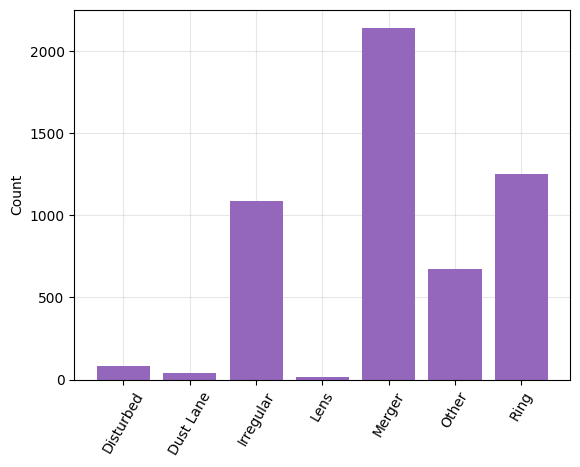

In [ ]:
# Visualize distribution of classes
plt.figure(dpi=100)
plt.bar(classes, class_counts, label=classes, color='tab:purple', zorder=2)
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.grid(True, alpha=0.3, zorder=1)
plt.show()

In [ ]:
len(np.where(odd_df['gz2_class'] == 'Dust Lane')[0])

37

In [ ]:
len(np.where(odd_df['gz2_class'] == 'Lens')[0])

15

In [ ]:
len(np.where(odd_df['gz2_class'] == 'Disturbed')[0])

84

As we can see, the classes are imbalanced. This will be addressed later when we build our classifier model.

In [ ]:
# Paths to image data and output folder
path_to_zip = "/content/drive/Shared drives/DLP Project/Backup Project/Models/Odd Classifier/data/images_gz2.zip"
output_folder = "/content/drive/Shared drives/DLP Project/Backup Project/Models/Odd Classifier/data_reduced/"

# Creating an image data folder for every odd class
r_folder = os.path.join(output_folder, 'ring')
l_folder = os.path.join(output_folder, 'lens')
d_folder = os.path.join(output_folder, 'disturbed')
i_folder = os.path.join(output_folder, 'irregular')
o_folder = os.path.join(output_folder, 'other')
m_folder = os.path.join(output_folder, 'merger')
u_folder = os.path.join(output_folder, 'dust_lane')

os.makedirs(r_folder, exist_ok=True)
os.makedirs(l_folder, exist_ok=True)
os.makedirs(d_folder, exist_ok=True)
os.makedirs(i_folder, exist_ok=True)
os.makedirs(o_folder, exist_ok=True)
os.makedirs(m_folder, exist_ok=True)
os.makedirs(u_folder, exist_ok=True)

In [ ]:
# Read the filename mapping
file_map_path = "/content/drive/Shared drives/DLP Project/Backup Project/Models/Odd Classifier/gz2_filename_mapping.csv"
data_map = pd.read_csv(file_map_path)

In [ ]:
# Function to extract images using asset_id for filenames (with progress bar)
def extract_images(zip_path, df, class_folder, output_folder):
  """
  Extracts images from a zip file based on the provided DataFrame and class folder
  to a desired output folder.
  """
  with zipfile.ZipFile(zip_path, 'r') as zip_ref:

    # Merge the data to get the asset_id for the corresponding dr7objid.
    # This matches the data mapping to odd_df, using NaN for missing matches.

    # Note: There should be no missing matches because `odd_df` is a subset of the
    # original DataFrame!

    merged_df = df.merge(data_map[['objid', 'asset_id']], left_on='dr7objid', right_on='objid', how='left')

    if merged_df['asset_id'].isnull().any():
      print("Warning: Some dr7objid values are missing asset_id mappings")

    image_names = [f"images/{int(asset_id)}.jpg" for asset_id in merged_df['asset_id'].dropna()]

    for image_name in tqdm(image_names, desc=f"Extracting images to {class_folder}", unit="image"):
      if image_name in zip_ref.namelist():
        zip_ref.extract(image_name, output_folder) # Extract image in output folder (Data/)
        shutil.move(os.path.join(output_folder, image_name), class_folder) # Move image from Data/images to respective class folder
      else:
        print(f"\nImage not found: {image_name}")

In [ ]:
class_names = ['Ring', 'Lens', 'Disturbed', 'Irregular', 'Other', 'Merger', 'Dust Lane']
class_folders = [r_folder, l_folder, d_folder, i_folder, o_folder, m_folder, u_folder]
for i, class_name in enumerate(class_names):
  print(f"Extracting images for class: {class_name}")
  extract_images(path_to_zip, odd_df[odd_df['gz2_class'] == class_name], class_folders[i], output_folder)

Extracting images for class: Ring


Extracting images to /content/drive/Shared drives/DLP Project/Backup Project/Models/Odd Classifier/data_reduced/ring: 100%|██████████| 1250/1250 [02:29<00:00,  8.33image/s]


Extracting images for class: Lens


Extracting images to /content/drive/Shared drives/DLP Project/Backup Project/Models/Odd Classifier/data_reduced/lens: 100%|██████████| 15/15 [00:00<00:00, 16.01image/s]


Extracting images for class: Disturbed


Extracting images to /content/drive/Shared drives/DLP Project/Backup Project/Models/Odd Classifier/data_reduced/disturbed: 100%|██████████| 84/84 [00:06<00:00, 13.11image/s]


Extracting images for class: Irregular


Extracting images to /content/drive/Shared drives/DLP Project/Backup Project/Models/Odd Classifier/data_reduced/irregular: 100%|██████████| 1085/1085 [01:16<00:00, 14.16image/s]



Image not found: images/275883.jpg

Image not found: images/284172.jpg
Extracting images for class: Other


Extracting images to /content/drive/Shared drives/DLP Project/Backup Project/Models/Odd Classifier/data_reduced/other: 100%|██████████| 671/671 [00:47<00:00, 14.05image/s]


Extracting images for class: Merger


Extracting images to /content/drive/Shared drives/DLP Project/Backup Project/Models/Odd Classifier/data_reduced/merger: 100%|██████████| 2145/2145 [02:36<00:00, 13.74image/s]


Extracting images for class: Dust Lane


Extracting images to /content/drive/Shared drives/DLP Project/Backup Project/Models/Odd Classifier/data_reduced/dust_lane: 100%|██████████| 37/37 [00:03<00:00, 12.30image/s]


According to the Galaxy Zoo team, there are 243,434 images in total. This is off by about 0.08% from the total count in the tables, hence the 'image not found' warnings. It's not clear what the cause of the discrepancy is, but they don't think the missing images have any particular sampling bias, so they assure this sample should be useful for research.

In [ ]:
def count_files(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

In [ ]:
total_count = 0
for i, class_name in enumerate(class_names):
  count = count_files(class_folders[i])
  print(f"{class_name} Galaxies: {count} images")
  total_count += count
print(f"\nTotal: {total_count}/{len(odd_df)} images")

Ring Galaxies: 1250 images
Lens Galaxies: 15 images
Disturbed Galaxies: 84 images
Irregular Galaxies: 1083 images
Other Galaxies: 671 images
Merger Galaxies: 2145 images
Dust Lane Galaxies: 37 images

Total: 5285/5287 images
